Training a qcgan with a gamma function

In [6]:
from scipy.special import kl_div,rel_entr
import numpy as np
from matplotlib import pyplot
import quantum_classical_1Dgamma as qc

import tensorflow as tf
from matplotlib import pyplot
from qibo import gates, hamiltonians, models, set_backend, set_threads

### batch size = 300

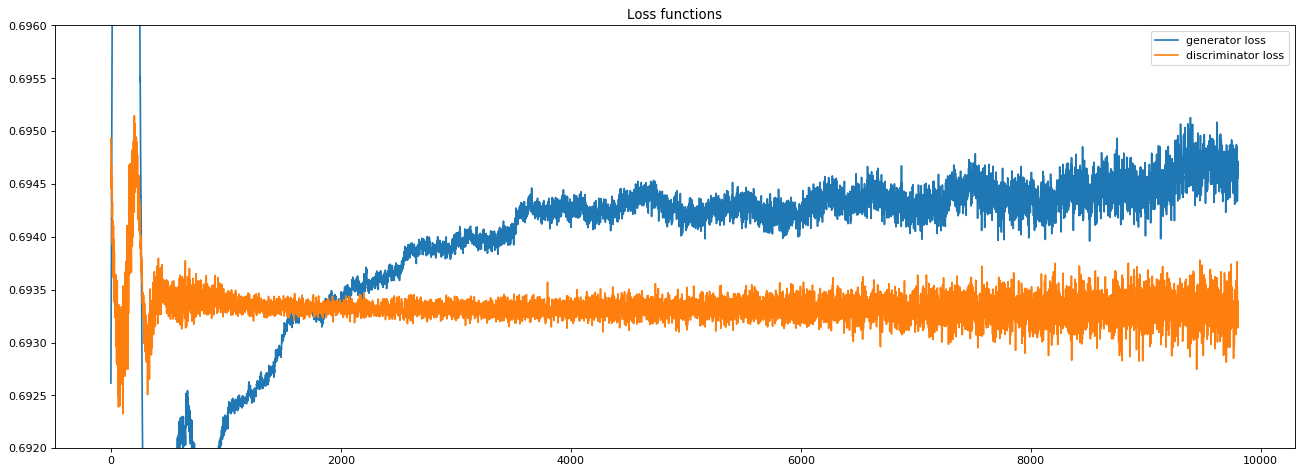

In [10]:
epochs=30000
d_loss = np.loadtxt(f"dloss_1Dgamma_1_3_2_10000_300_0.1", delimiter=' ')
g_loss= np.loadtxt(f"gloss_1Dgamma_1_3_2_10000_300_0.1", delimiter=' ')
pyplot.figure(figsize=(20, 7), dpi=80)
pyplot.plot(np.linspace(0, len(g_loss), len(g_loss)), g_loss, label='generator loss')
pyplot.plot(np.linspace(0, len(g_loss), len(g_loss)), d_loss, label='discriminator loss')
pyplot.legend()
pyplot.title("Loss functions")
pyplot.ylim(0.692,0.696)
#pyplot.xlim(0,1000)
pyplot.show()
 

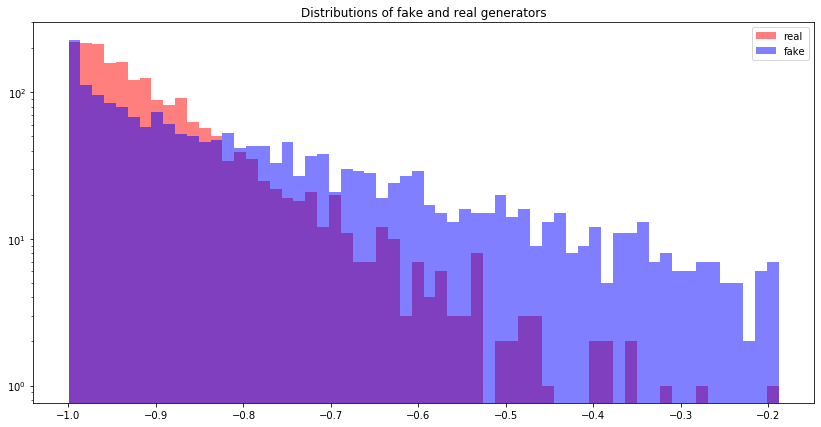

In [12]:
def hamiltonian1():
        m0 = hamiltonians.Z(1).matrix
        ham = hamiltonians.Hamiltonian(1, m0)
        return ham
    
# number of qubits generator
nqubits = 1
# create hamiltonians
hamiltonian1 = hamiltonian1()

latent_dim=3
samples=2000
nqubits=1
layers=2
# create quantum generator
circuit = models.Circuit(nqubits)
for l in range(layers):
    for q in range(nqubits):
        circuit.add(gates.RY(q, 0))
        circuit.add(gates.RZ(q, 0))
for q in range(nqubits):
    circuit.add(gates.RY(q, 0))  

params = np.loadtxt(f"PARAMS_1Dgamma_1_3_2_10000_300_0.1", delimiter=' ', unpack='true')
#print(params,epochs)
params = tf.Variable(params)

x_fake1, y_fake = qc.generate_fake_samples(params, latent_dim, samples, circuit, nqubits, layers, hamiltonian1)

#x_fake,_= qc2.generate_fake_samples(params, latent_dim, samples)
fig, ax = pyplot.subplots(figsize = (14, 7))
s=qc.generate_training_real_samples(10000)
x_real1, y_real = qc.generate_real_samples(samples, s, 10000)

x_real1=x_real1
x_fake1=x_fake1
ax.set_yscale('log')
nbins=60
bins_real=pyplot.hist(x_real1, color='red', bins=nbins,label='real', alpha=0.5)
bins_fake=pyplot.hist(x_fake1.numpy(), bins=bins_real[1],color='blue', label='fake', alpha=0.5)

pyplot.legend()
pyplot.title("Distributions of fake and real generators")
pyplot.show()

### batch size = 200

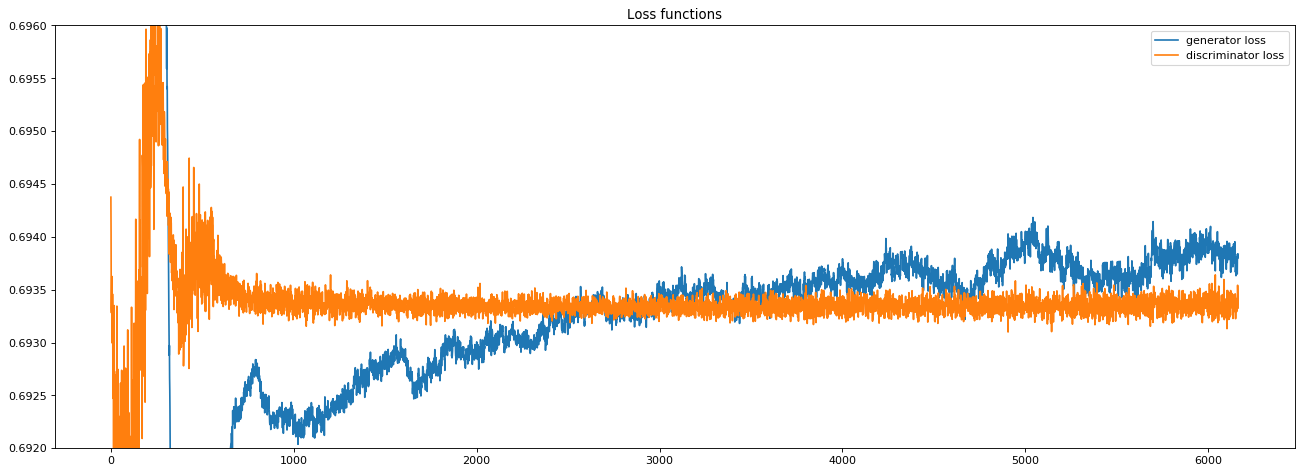

In [3]:
epochs=30000
d_loss = np.loadtxt(f"dloss_1Dgamma_1_3_2_10000_200_0.1", delimiter=' ')
g_loss= np.loadtxt(f"gloss_1Dgamma_1_3_2_10000_200_0.1", delimiter=' ')
pyplot.figure(figsize=(20, 7), dpi=80)
pyplot.plot(np.linspace(0, len(g_loss), len(g_loss)), g_loss, label='generator loss')
pyplot.plot(np.linspace(0, len(g_loss), len(g_loss)), d_loss, label='discriminator loss')
pyplot.legend()
pyplot.title("Loss functions")
pyplot.ylim(0.692,0.696)
#pyplot.xlim(0,1000)
pyplot.show()
 

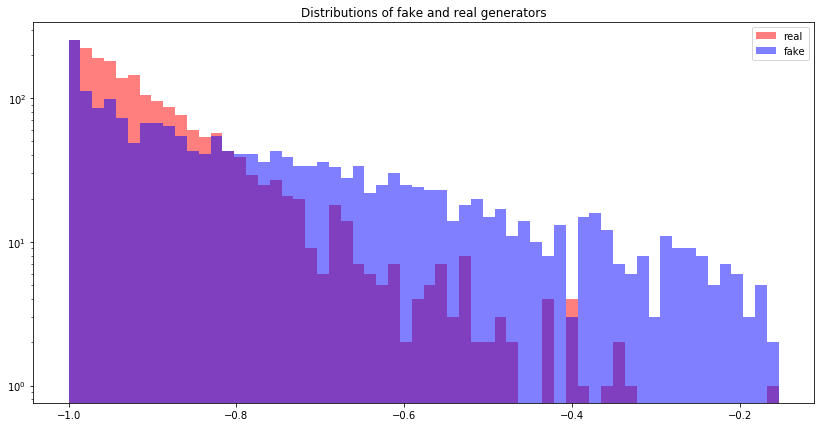

In [13]:
def hamiltonian1():
        m0 = hamiltonians.Z(1).matrix
        ham = hamiltonians.Hamiltonian(1, m0)
        return ham
    
# number of qubits generator
nqubits = 1
# create hamiltonians
hamiltonian1 = hamiltonian1()

latent_dim=3
samples=2000
nqubits=1
layers=2
# create quantum generator
circuit = models.Circuit(nqubits)
for l in range(layers):
    for q in range(nqubits):
        circuit.add(gates.RY(q, 0))
        circuit.add(gates.RZ(q, 0))
for q in range(nqubits):
    circuit.add(gates.RY(q, 0))  

params = np.loadtxt(f"PARAMS_1Dgamma_1_3_2_10000_200_0.1", delimiter=' ', unpack='true')
#print(params,epochs)
params = tf.Variable(params)

x_fake1, y_fake = qc.generate_fake_samples(params, latent_dim, samples, circuit, nqubits, layers, hamiltonian1)

#x_fake,_= qc2.generate_fake_samples(params, latent_dim, samples)
fig, ax = pyplot.subplots(figsize = (14, 7))
s=qc.generate_training_real_samples(10000)
x_real1, y_real = qc.generate_real_samples(samples, s, 10000)

x_real1=x_real1
x_fake1=x_fake1
ax.set_yscale('log')
nbins=60
bins_real=pyplot.hist(x_real1, color='red', bins=nbins,label='real', alpha=0.5)
bins_fake=pyplot.hist(x_fake1.numpy(), bins=bins_real[1],color='blue', label='fake', alpha=0.5)

pyplot.legend()
pyplot.title("Distributions of fake and real generators")
pyplot.show()

piu è piccolo il batch_size meglio è per stocasticità.

fine tuning learning rate


github token